In [101]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset
from sklearn.datasets import load_wine 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [66]:
X, y = load_wine(return_X_y=True)

In [92]:
USAR_SCALER = False
K = 1
DISTANCIA = "euclidean" # euclidean, manhattan

In [93]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, test_size=0.2, random_state=99)

if USAR_SCALER:
    ss = StandardScaler()
    X_treino = ss.fit_transform(X_treino)
    X_teste = ss.transform(X_teste)

In [94]:
knn = KNeighborsClassifier(n_neighbors=K, metric=DISTANCIA)
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [95]:
pred = knn.predict(X_teste)

In [96]:
acuracia = accuracy_score(y_teste, pred)
print("A acurácia no conjunto de testes: %.2f" % acuracia)

A acurácia no conjunto de testes: 0.78


In [100]:
print(classification_report(y_teste, pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.92      0.79      0.85        14
           2       0.67      0.60      0.63        10

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.76        36
weighted avg       0.79      0.78      0.78        36



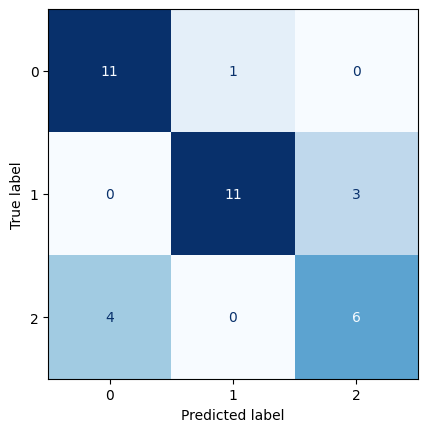

In [112]:
ConfusionMatrixDisplay.from_predictions(y_teste, pred, colorbar=False, cmap="Blues")